<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%203/CreditDataset_Hero_Kartiko_1103210205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree**

Prompt : buatlah model algoritma decision tree dengan dataset 'CreditDataset.csv' pastikan terdapat matriks evaluasi mencakup model klasifikasi Akurasi, Presisi, Recall, F1, AUC, ROC, dll

In [2]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 3/CreditDataset.csv')

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
# Memisahkan fitur (X) dan target (y)
# Misalkan X adalah semua kolom kecuali kolom target (misalnya 'Class' atau 'CreditRisk')
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values   # Kolom terakhir sebagai target

print(dataset.head().index)

RangeIndex(start=0, stop=5, step=1)


In [ ]:
# Jika X sudah berbentuk numpy.ndarray, ubah kembali ke DataFrame
X = pd.DataFrame(X, columns=dataset.columns[:-1])
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Menerapkan One-Hot Encoding pada kolom kategorikal
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

In [ ]:
# Melakukan transformasi pada data fitur
X = ct.fit_transform(X)  # Setelah transformasi, X menjadi numpy array

In [ ]:
# Membagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=50)

In [ ]:
# Melakukan standardisasi pada sparse matrix
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)  # Fit dan transformasi pada training set
X_test = scaler.transform(X_test)        # Transformasi pada test set menggunakan skala yang sama

In [ ]:
# Membangun model Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)  # Melatih model pada training set

DecisionTreeClassifier(random_state=0)

In [ ]:
# Memprediksi hasil pada test set
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

Akurasi Model Decision Tree: 0.70
Presisi Model Decision Tree: 0.65
Recall Model Decision Tree: 0.63
F1-Score Model Decision Tree: 0.64


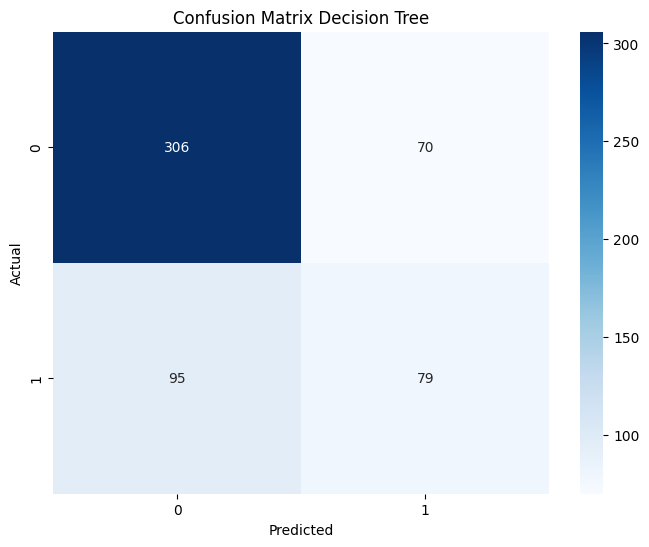

In [ ]:
# Menampilkan hasil evaluasi
print(f"Akurasi Model Decision Tree: {accuracy:.2f}")
print(f"Presisi Model Decision Tree: {precision:.2f}")
print(f"Recall Model Decision Tree: {recall:.2f}")
print(f"F1-Score Model Decision Tree: {f1:.2f}")

# Membuat confusion matrix dan menampilkan dengan heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **K-NN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = dataset.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = dataset.iloc[:, -1].values   # Kolom terakhir sebagai target

In [ ]:
# Deteksi kolom yang merupakan data kategorikal (object)
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Melakukan encoding untuk kolom kategorikal menggunakan OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
# Membagi dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Melakukan standardisasi pada fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit dan transformasi pada training set
X_test = scaler.transform(X_test)        # Transformasi pada test set menggunakan skala yang sama

In [ ]:
# Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Memprediksi hasil pada test set
y_pred = knn.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Akurasi: 0.66
Presisi: 0.55
Recall: 0.54
F1-Score: 0.53

Confusion Matrix:
[[118  24]
 [ 44  14]]


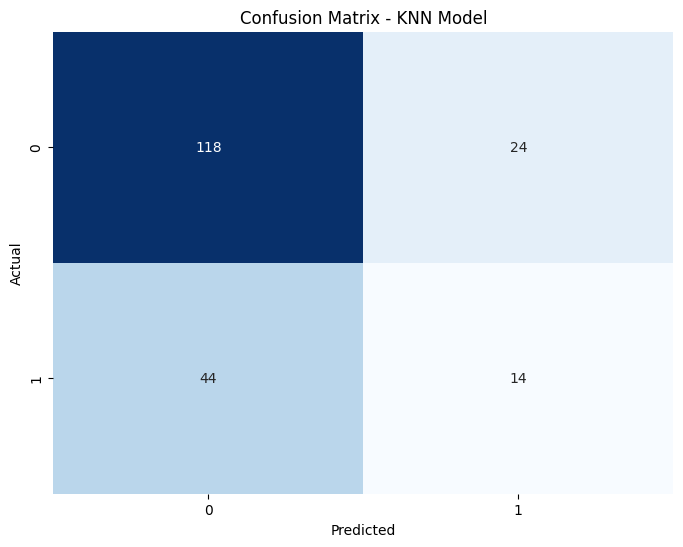

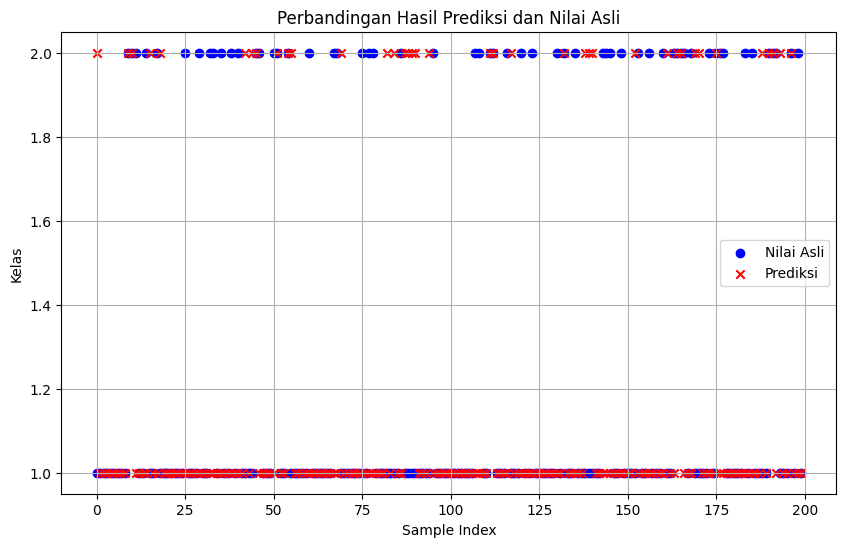

In [ ]:
# Visualisasi Confusion Matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot untuk membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Nilai Asli')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Prediksi')
plt.title('Perbandingan Hasil Prediksi dan Nilai Asli')
plt.xlabel('Sample Index')
plt.ylabel('Kelas')
plt.legend()
plt.grid(True)
plt.show()
